# 1. Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 5.0)

In [2]:
# Fuzzywuzzy is a python package for string matching
# If you don't have it use pip install fuzzywuzzy in the Anaconda Prompt to install it
from fuzzywuzzy import fuzz


C:\Users\aaronsmoke\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
df_movies.shape

(27278, 3)

In [6]:
df_movies.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [7]:
df_ratings.shape

(1048575, 4)

In [8]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


In [9]:
num_users = len(df_ratings.userId.unique())
num_items = len(df_ratings.movieId.unique())
print('There are {} users and {} movies in this data set that are unique.'.format(num_users, num_items))

There are 7120 users and 14026 movies in this data set that are unique.


In [10]:
num = df_ratings['rating'].value_counts()
print('The number of ratings of each type are:--')
print(num)

The number of ratings of each type are:--
4.0    295135
3.0    226202
5.0    152562
3.5    112926
4.5     79848
2.0     74706
2.5     44791
1.0     35144
1.5     14029
0.5     13232
Name: rating, dtype: int64


# 2. Exploratory Data Analysis and Wrangling

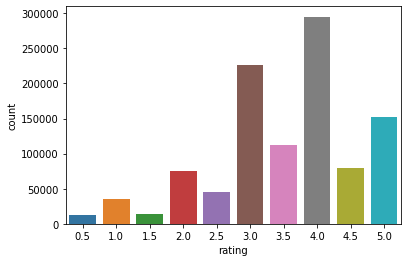

In [11]:
sns.countplot(x="rating", data=df_ratings)

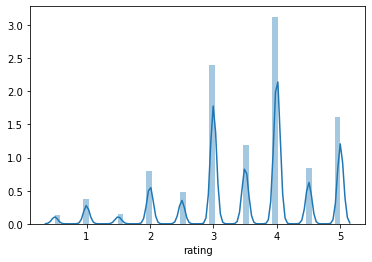

In [12]:
sns.distplot(df_ratings['rating'])

In [13]:
# Here the movies and ratings dataframe are joined to make a single data frame
# Left join is performed here & movieID is used as keys here

movie_rat = pd.merge(left=df_movies, right=df_ratings, how="left", left_on='movieId', right_on='movieId')

In [14]:
movie_rat.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,9.449194e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,8.582755e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,8.339819e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,9.434979e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,1.230859e+09


In [15]:
movie_rat.tail(10)

,movieId,title,genres,userId,rating,timestamp
1061817,131241,Ants in the Pants (2000),Comedy|Romance,NaN,NaN,NaN
1061818,131243,Werner - Gekotzt wird später (2003),Animation|Comedy,NaN,NaN,NaN
1061819,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
1061820,131250,No More School (2000),Comedy,NaN,NaN,NaN
1061821,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,NaN,NaN,NaN
1061822,131254,Kein Bund für's Leben (2007),Comedy,NaN,NaN,NaN
1061823,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,NaN,NaN,NaN
1061824,131258,The Pirates (2014),Adventure,NaN,NaN,NaN
1061825,131260,Rentun Ruusu (2001),(no genres listed),NaN,NaN,NaN
1061826,131262,Innocence (2014),Adventure|Fantasy|Horror,NaN,NaN,NaN


In [16]:
movie_rat.isna()

,movieId,title,genres,userId,rating,timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1061822,False,False,False,True,True,True
1061823,False,False,False,True,True,True
1061824,False,False,False,True,True,True
1061825,False,False,False,True,True,True


### Null values exist in the dataframe, so we have to handle that.

In [17]:
movie_rat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061827 entries, 0 to 1061826
Data columns (total 6 columns):
movieId      1061827 non-null int64
title        1061827 non-null object
genres       1061827 non-null object
userId       1048575 non-null float64
rating       1048575 non-null float64
timestamp    1048575 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 56.7+ MB


In [18]:
# NaN values exist only in userId, rating & timestamp column
# Calculating the missing values

miss_val = movie_rat.isnull().sum()
miss_val = miss_val[miss_val>0]
print(miss_val)

userId       13252
rating       13252
timestamp    13252
dtype: int64


In [19]:
miss_val.sort_values(inplace=True)

In [20]:
print(miss_val)

userId       13252
rating       13252
timestamp    13252
dtype: int64


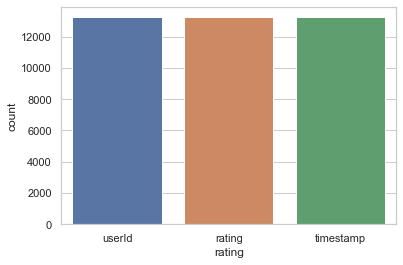

In [21]:
# Visualizing the missing values
miss_val = miss_val.to_frame()
miss_val.columns = ['count']
miss_val.index.names = ['rating']
miss_val['rating'] = miss_val.index

# Plotting the missing values
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'rating', y = 'count', data=miss_val)
plt.show()

In [22]:
# Ratings Count
df_ratings_cnt_tmp = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp


,count
rating,
0.5,13232
1.0,35144
1.5,14029
2.0,74706
2.5,44791
3.0,226202
3.5,112926
4.0,295135
4.5,79848


In [23]:
# There are still multiple ratings of zero

total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - df_ratings.shape[0]

# Appending counts of zero in ratings

df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),verify_integrity=True,
).sort_index()
print(df_ratings_cnt)

        count
0.0  98816545
0.5     13232
1.0     35144
1.5     14029
2.0     74706
2.5     44791
3.0    226202
3.5    112926
4.0    295135
4.5     79848
5.0    152562


In [24]:
# Since the count is very high and values are not normalizer, we will log of the values
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
print (df_ratings_cnt)

        count  log_count
0.0  98816545  18.408776
0.5     13232   9.490393
1.0     35144  10.467209
1.5     14029   9.548882
2.0     74706  11.221316
2.5     44791  10.709763
3.0    226202  12.329184
3.5    112926  11.634488
4.0    295135  12.595188
4.5     79848  11.287880
5.0    152562  11.935326


Text(0, 0.5, 'No of ratings')

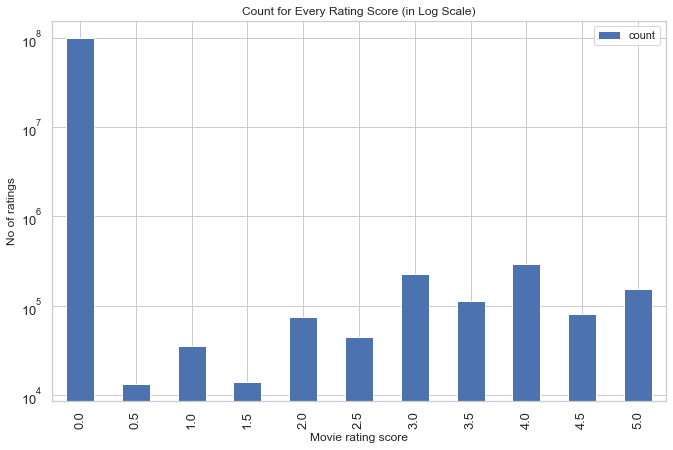

In [25]:
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(11, 7),
    title='Count for Every Rating Score (in Log Scale)',
    logy=True,
    fontsize=13
)
ax.set_xlabel("Movie rating score")
ax.set_ylabel("No of ratings")

In [26]:
# Checking the rating frequency by moiveId

df_movies_cnt = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])
df_movies_cnt.head()

,count
movieId,
1,2569
2,1155
3,685
4,138
5,657


Text(0, 0.5, 'number of ratings')

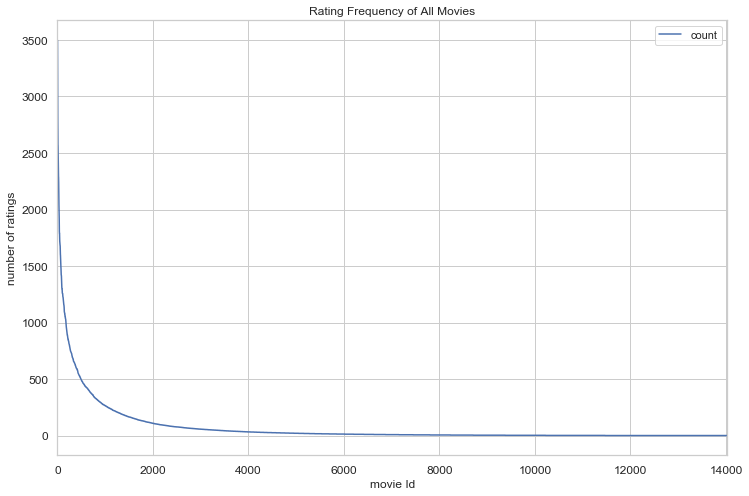

In [27]:
# Plotting the rating frequency
ax = df_movies_cnt .sort_values('count', ascending=False).reset_index(drop=True).plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

In [28]:
# Filtering Data

popularity_thres = 50
popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = df_ratings[df_ratings.movieId.isin(popular_movies)]
print('Shape of original ratings data: ', df_ratings.shape)
print('Shape of ratings data after dropping unpopular/low rated movies: ', df_ratings_drop_movies.shape)

Shape of original ratings data:  (1048575, 4)
Shape of ratings data after dropping unpopular/low rated movies:  (943006, 4)


In [29]:



# Getting number of ratings given by every user to find less active users
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_users_cnt.head()

,count
userId,
1,161
2,55
3,184
4,28
5,66


Text(0, 0.5, 'number of ratings')

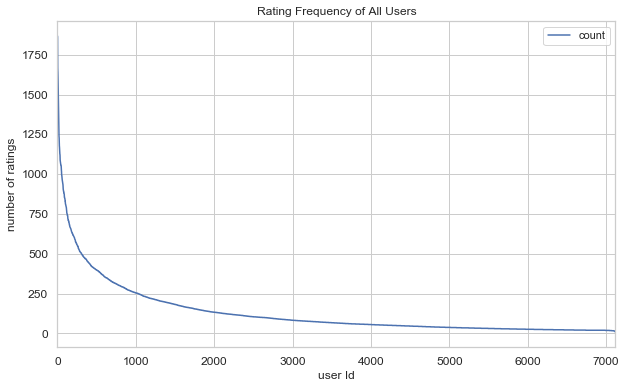

In [30]:
# Plot rating frequency of all users
ax = df_users_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(10, 6),
        title='Rating Frequency of All Users',
        fontsize=12
    )
ax.set_xlabel("user Id")
ax.set_ylabel("number of ratings")

In [31]:
# Filtering data
ratings_thres = 50
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]
print('Shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

Shape of original ratings data:  (1048575, 4)
shape of ratings data after dropping both unpopular movies and inactive users:  (857707, 4)


In [32]:
# pivot and create movie-user matrix
movie_user_mat = df_ratings_drop_users.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# create mapper from movie title to index using movie ID
movie_to_idx = {
    movie: i for i, movie in 
    enumerate(list(df_movies.set_index('movieId').loc[movie_user_mat.index].title))
}
# transform matrix to scipy sparse matrix
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

# 3. Model defining

In [33]:
# We will be using KNN Algorithm here to recommend movies
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(movie_user_mat_sparse)

# If no space on drive error add %env JOBLIB_TEMP_FOLDER=/tmp above this code

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [34]:
def fuzzy_matching(mapper, fav_movie, verbose=True):
  
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('No match is found')
        return
    if verbose:
        print('Possible matches for: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

In [35]:

def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
   
    # fit
    model_knn.fit(data)
    # get input movie index
    print('Input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    # inference
    print('Recommendation system starts')
    
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

# 4.Testing the Model

## Test 1

In [36]:
my_favorite = 'V for Vendetta'

make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    fav_movie=my_favorite,
    mapper=movie_to_idx,
    n_recommendations=10)

Input movie: V for Vendetta
Possible matches for: ['V for Vendetta (2006)']

Recommendation system starts
Recommendations for V for Vendetta:
1: Kill Bill: Vol. 2 (2004), with distance of 0.45811667820588053
2: Kill Bill: Vol. 1 (2003), with distance of 0.45113614263931523
3: Lord of the Rings: The Return of the King, The (2003), with distance of 0.44164255679675435
4: Casino Royale (2006), with distance of 0.44065041434654284
5: Prestige, The (2006), with distance of 0.439073634334578
6: 300 (2007), with distance of 0.43626464974891654
7: Iron Man (2008), with distance of 0.43219217884683925
8: Sin City (2005), with distance of 0.42203184608146216
9: Dark Knight, The (2008), with distance of 0.4187473948012579
10: Batman Begins (2005), with distance of 0.3800680734223937


## Test 2

In [37]:
my_favorite = 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)'

make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    fav_movie=my_favorite,
    mapper=movie_to_idx,
    n_recommendations=10)

Input movie: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
Possible matches for: ['Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)']

Recommendation system starts
Recommendations for Shanghai Triad (Yao a yao yao dao waipo qiao) (1995):
1: Amateur (1994), with distance of 0.812136512046904
2: Chungking Express (Chung Hing sam lam) (1994), with distance of 0.8052131703346157
3: Farinelli: il castrato (1994), with distance of 0.7994004038621397
4: Farewell My Concubine (Ba wang bie ji) (1993), with distance of 0.7874038762523473
5: Madness of King George, The (1994), with distance of 0.7848752995357182
6: Eat Drink Man Woman (Yin shi nan nu) (1994), with distance of 0.7830370983465151
7: Mrs. Parker and the Vicious Circle (1994), with distance of 0.7810640790405625
8: Richard III (1995), with distance of 0.7629395484286996
9: Queen Margot (Reine Margot, La) (1994), with distance of 0.7624432396973219
10: To Live (Huozhe) (1994), with distance of 0.7587464776779457
